In [1]:
# hide ssl warnings for this example.
import requests
requests.packages.urllib3.disable_warnings()

# Turning python-fmrest foundset into DataFrame

This is a short example on how to easily build a Pandas DataFrame from a Foundset.

Here you can find information about [Pandas](http://pandas.pydata.org) and [DataFrames](http://pandas.pydata.org/pandas-docs/stable/dsintro.html) and how you can work with these data structures when analysing data.

For this example, make sure to first install Pandas (`pip install pandas`) and optionally Matplotlib (`pip install matplotlib`).

In [2]:
import fmrest
from pandas.plotting import parallel_coordinates
from matplotlib import pyplot as plt
%matplotlib inline

## Create server instance and login

First, we create our server instance just like in the examples before.

In [3]:
fms = fmrest.Server('https://10.211.55.15',
                    user='admin',
                    password='admin',
                    database='Contacts',
                    layout='Iris',
                    verify_ssl=False,
                    #type_conversion=True #Danger!
                   )

fms.login()

'6122520b9dd23cbe68e1cf5449dcb101021e41a94b6dcc9ba7a2'

If you have numbers in text fields or want to work with dates, you can try out `type_conversion=True`.

**Note**: As this "type-guessing" can, at times, lead to unexpected results, I strongly recommended you to do the type conversion yourself when working with your own "known" data fields.

## Fetch records from server

Let's fetch all data from our Iris layout as specified above.

(When you have more than 100 records to fetch, make sure to specify the `limit` parameter as the Data API defaults to 100 records.)

In [4]:
foundset = fms.get_records(limit=150)
foundset

<Foundset consumed_records=0 is_complete=False>

## Turn foundset into DataFrame

Now that we have our Foundset instance, the only thing we need to do is to call the `to_df` method. This will give us a Pandas DataFrame.

Let's look at the first 5 rows.

In [5]:
df = foundset.to_df()
df.head()

,class,modId,petal_length,petal_width,recordId,sepal_length,sepal_width
0,Iris-setosa,5,1.4,0.2,1,5.1,3.5
1,Iris-setosa,5,1.4,0.2,2,4.9,3.0
2,Iris-setosa,5,1.3,0.2,3,4.7,3.2
3,Iris-setosa,5,1.5,0.2,4,4.6,3.1
4,Iris-setosa,5,1.4,0.2,5,5.0,3.6


Since we are not interested in `recordId` or `modId`, we just drop them.

In [6]:
df.drop(['recordId', 'modId'], axis=1, inplace=True)
df.head()

,class,petal_length,petal_width,sepal_length,sepal_width
0,Iris-setosa,1.4,0.2,5.1,3.5
1,Iris-setosa,1.4,0.2,4.9,3.0
2,Iris-setosa,1.3,0.2,4.7,3.2
3,Iris-setosa,1.5,0.2,4.6,3.1
4,Iris-setosa,1.4,0.2,5.0,3.6


Before working with your data, check that the types are OK (previous versions of the Data API always returned strings and ignored the data type set in your DB schema).

In [7]:
df.dtypes

class            object
petal_length    float64
petal_width     float64
sepal_length    float64
sepal_width     float64
dtype: object

## Going from here

With your DataFrame ready, you can go on analyzing and plotting your data as you wish...

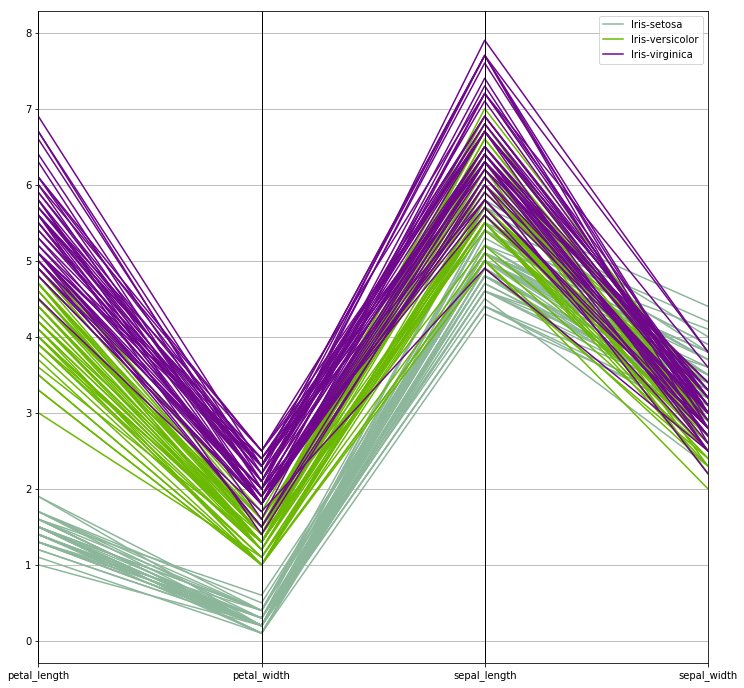

In [8]:
plt.figure(figsize=(12, 12))
parallel_coordinates(df, 'class')

Learn more here: https://pandas.pydata.org/pandas-docs/stable/index.html